<a href="https://colab.research.google.com/github/abidshafee/Deep-Learning-TF/blob/main/bitcoin_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mocking: https://youtu.be/GFSiL6zEZF0 \
https://youtu.be/QIUxPv5PJOY

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt
plt.style.use('fivethirtyeight')

In [2]:
# libraries for ML Modeling
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [3]:
# for bitcoin ticker symbol: BTC
cryptocurrency = 'BTC'
price_in_usd = 'USD'

In [4]:
starting_from = dt.datetime(2011,1,1)
end = dt.datetime.now()
print(end)

2021-04-28 21:13:23.498214


In [5]:
# reading data from yahoo finance api
#df = web.DataReader(f'{cryptocurrency}-{price_in_usd}', 'yahoo', starting_from, end)

#Or we can say
df = web.DataReader('BTC-USD', data_source='yahoo', start=starting_from, end=end)
# ticker for BTC price in USD: BTC-USD

In [6]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-09-16,468.174011,452.421997,465.864014,457.334015,2.105680e+07,457.334015
2014-09-17,456.859985,413.104004,456.859985,424.440002,3.448320e+07,424.440002
2014-09-18,427.834991,384.532013,424.102997,394.795990,3.791970e+07,394.795990
2014-09-19,423.295990,389.882996,394.673004,408.903992,3.686360e+07,408.903992
2014-09-20,412.425995,393.181000,408.084991,398.821014,2.658010e+07,398.821014
...,...,...,...,...,...,...
2021-04-23,51167.562500,48805.285156,51143.226562,50050.867188,4.901449e+10,50050.867188
2021-04-24,50506.019531,47159.484375,50052.832031,49004.253906,4.611711e+10,49004.253906
2021-04-25,54288.003906,48852.796875,49077.792969,54021.753906,5.828404e+10,54021.753906


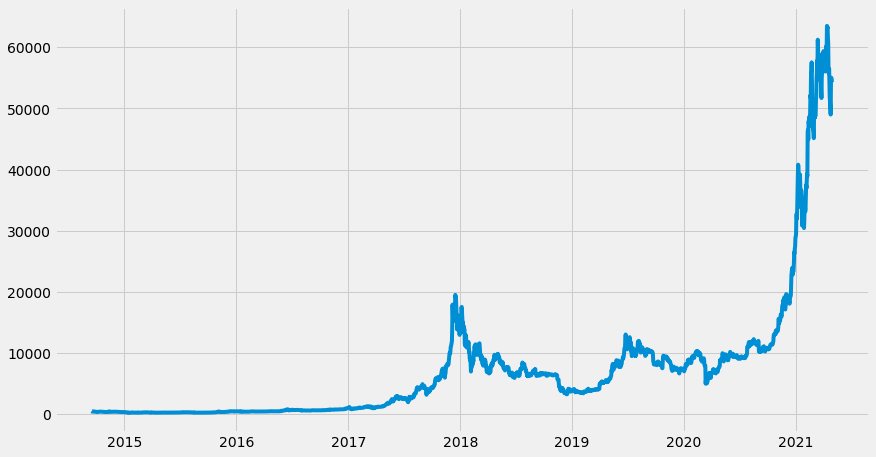

In [13]:
plt.figure(figsize=(13, 7.3))
plt.plot(df['Close'])
plt.show()

We are going to predict the **closing price** of this dataset

In [ ]:
df.describe(include='all')

,High,Low,Open,Close,Volume,Adj Close
count,2412.000000,2412.000000,2412.000000,2412.000000,2.412000e+03,2412.000000
mean,7214.630924,6814.074383,7018.888945,7040.314968,1.187884e+10,7040.314968
std,10965.857208,10277.942692,10637.700511,10679.064783,1.882384e+10,10679.064783
min,211.731003,171.509995,176.897003,178.102997,5.914570e+06,178.102997
25%,461.199997,451.772263,455.806999,455.670746,6.779840e+07,455.670746
50%,4266.731201,4023.237671,4137.675049,4147.023438,3.836735e+09,4147.023438
75%,9215.193359,8807.463135,9017.696289,9044.302979,1.787633e+10,9044.302979
max,64863.097656,62208.964844,63523.753906,63503.457031,3.509679e+11,63503.457031


Scaling data into sandard deviation range

In [ ]:
df['Close']

Scaling the Target value

In [ ]:
scale = StandardScaler()
#Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.
#reshape(1, -1) if it contains a single sample.
scaled_data = scale.fit_transform(df['Close'].values.reshape(-1,1))

In [ ]:
len(scaled_data)

2412

In [ ]:
scaled_data

array([[-0.61656579],
       [-0.61964666],
       [-0.62242314],
       ...,
       [ 4.40030864],
       [ 4.49503351],
       [ 4.48108211]])

## **To replace multiple values in a column with a single values**:
let say we want to replace value-1, value-2, and value-3 from the column-3 with the value: 'replaced_value', So the following code will do that:
```
values = ['value-1', 'value-2', 'value-3']
for val in values:
    df['column-3'].replace(to_replace=val,
                           value = 'replaced_value',
                           inplace = True)

```
To learn more data analysis techniques read our blog:
https://csschoolonline.xyz/data-science/
see other parameters supported by -
pandas.DataFrame.replace>>
https://pandas.pydata.org/.../pandas.DataFrame.replace.html

In [ ]:
pred_days = 60

In [ ]:
x_train, y_train = [],[]

In [ ]:
for x in range(pred_days, len(scaled_data)):
  x_train.append(scaled_data[x-pred_days:x, 0])
  y_train.append(scaled_data[x, 0])

In [ ]:
len(x_train)

2352

In [ ]:
y_train

Converting data to numpy array

In [ ]:
x_train = np.array(x_train)
y_train = np.array(y_train)

In [ ]:
x_train

array([[-0.61656579, -0.61964666, -0.62242314, ..., -0.61999368,
        -0.62214009, -0.62417112],
       [-0.61964666, -0.62242314, -0.62110177, ..., -0.62214009,
        -0.62417112, -0.62307071],
       [-0.62242314, -0.62110177, -0.62204615, ..., -0.62417112,
        -0.62307071, -0.6231151 ],
       ...,
       [ 3.75143732,  3.68080883,  3.66663718, ...,  4.12606096,
         4.02839311,  3.9303667 ],
       [ 3.68080883,  3.66663718,  3.56822955, ...,  4.02839311,
         3.9303667 ,  4.40030864],
       [ 3.66663718,  3.56822955,  3.98909079, ...,  3.9303667 ,
         4.40030864,  4.49503351]])

In [ ]:
y_train

array([-0.62307071, -0.6231151 , -0.6242587 , ...,  4.40030864,
        4.49503351,  4.48108211])

### **Deep Modeling**

In [ ]:
model = Sequential()